In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


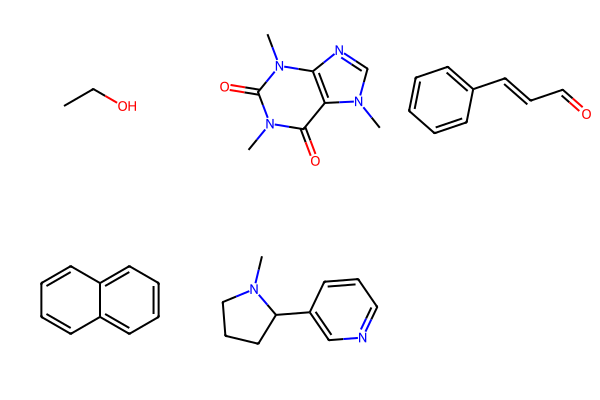

In [3]:
Ethanol = Chem.MolFromSmiles('CCO')
Caffeine = Chem.MolFromSmiles('Cn1cnc2c1c(=O)n(c(=O)n2C)C')
Cinnamaldehyde = Chem.MolFromSmiles('c1ccc(cc1)/C=C/C=O')
Naphthalene = Chem.MolFromSmiles('c12ccccc1cccc2')
Nicotine = Chem.MolFromSmiles('CN1CCCC1C2=CN=CC=C2')

my_molecules = [Ethanol, Caffeine, Cinnamaldehyde, Naphthalene, Nicotine]

Draw.MolsToGridImage(my_molecules, useSVG=False)


In [4]:
print (Ethanol)

In [20]:
def fingerprint(mol_RD):
    return Fingerprinter.FingerprintMol(mol_RD)[0]

def mol_wt(mol_RD):
    return Descriptors.MolWt(mol_RD)

def descriptor(mol_RD):
    return np.append(Fingerprinter.FingerprintMol(mol_RD)[0], Descriptors.MolWt(mol_RD))

In [21]:
import pandas as pd

with open('1K_unformated_unlabeled_SMILES_data.txt') as my_file:
    dataset = my_file.readlines()

array_of_array = []
for line in dataset:
        formated_data = line.split()
        array_of_array.append(formated_data)



df = pd.DataFrame(array_of_array)
df = df.drop([0, 1, 4, 5], axis =1)
df = df.rename(columns = {2: "Compound Name", 3: 'Solubility', 6: 'SMILES'}) 
df['Solubility'] = df['Solubility'].astype(float)
df['ROMol'] = df['SMILES'].apply(Chem.MolFromSmiles)
df['FP'] = df['ROMol'].apply(fingerprint)
df['Mol_wt'] = df['ROMol'].apply(mol_wt)
df['Descriptor'] = df['ROMol'].apply(descriptor)
df['logP'] = df['ROMol'].map(Descriptors.MolLogP)
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='SMILES')

,Compound Name,Solubility,SMILES,ROMol,FP,Mol_wt,Descriptor,logP
0,n-pentane,-3.18,CCCCC,,"[0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",72.151,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 72.151]",2.1965
1,cyclopentane,-2.64,C1CCCC1,,"[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",70.135,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 70.135]",1.9505
2,n-hexane,-3.84,CCCCCC,,"[0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",86.178,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 86.178]",2.5866
3,2-methylpentane,-3.74,CCCC(C)C,,"[0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",86.178,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 86.178]",2.4425
4,"2,2-dimethylbutane",-3.55,CCC(C)(C)C,,"[0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",86.178,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 86.17799999999998]",2.4425

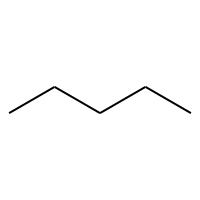
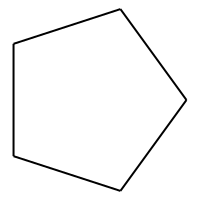
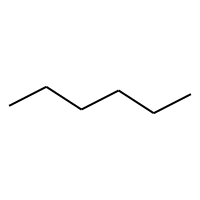
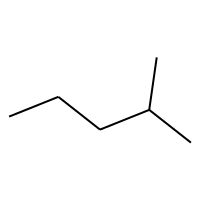
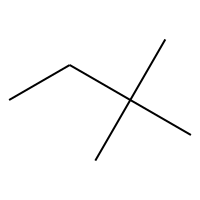

In [22]:
df.head()

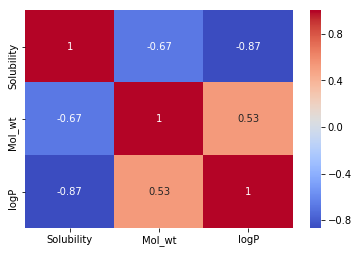

In [23]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)



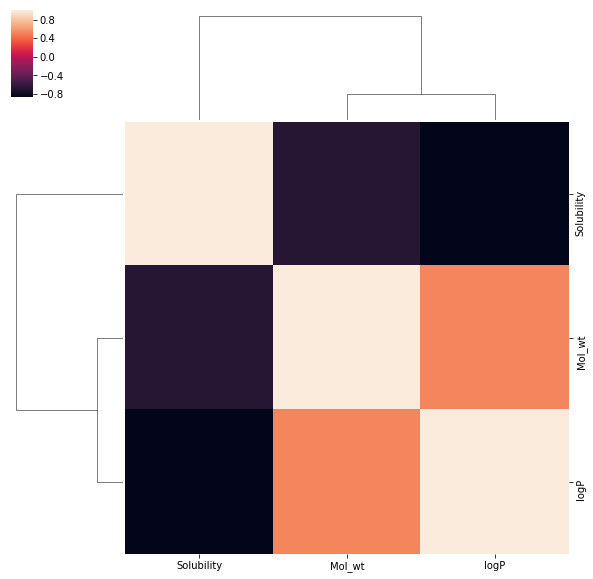

In [8]:
sns.clustermap(df.corr())

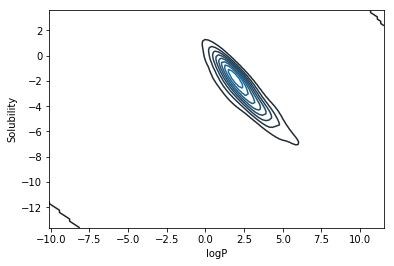

In [9]:
#sns.kdeplot(df['Mol_wt'], df['Solubility'])
sns.kdeplot(df['logP'], df['Solubility'])

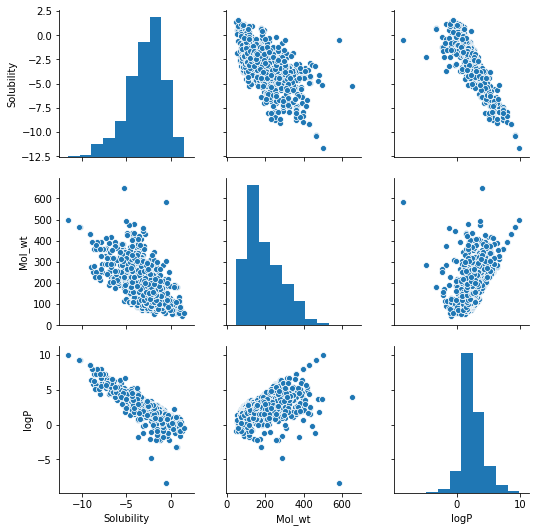

In [10]:
sns.pairplot(df)

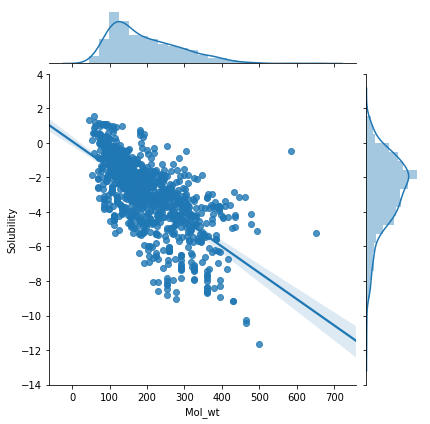

In [11]:
sns.jointplot(x='Mol_wt',y='Solubility',data=df,kind='reg')

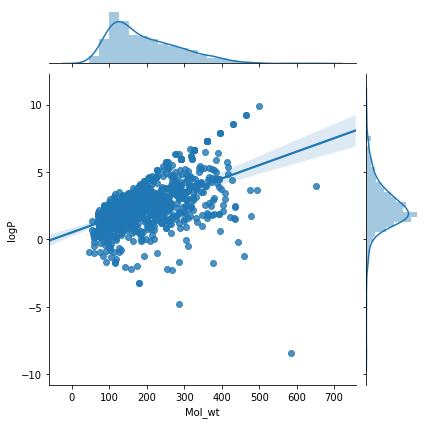

In [12]:
sns.jointplot(x='Mol_wt',y='logP',data=df,kind='reg')

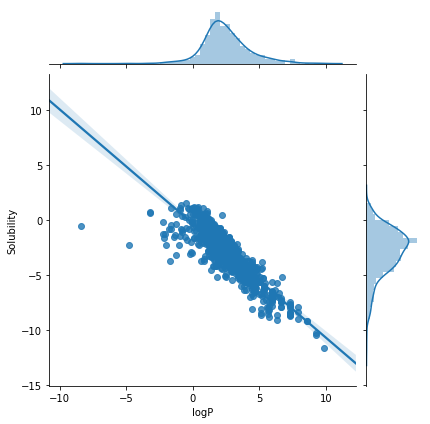

In [13]:
sns.jointplot(x='logP',y='Solubility',data=df,kind='reg')

/home/ray/miniconda2/envs/my-rdkit-env/lib/python3.6/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


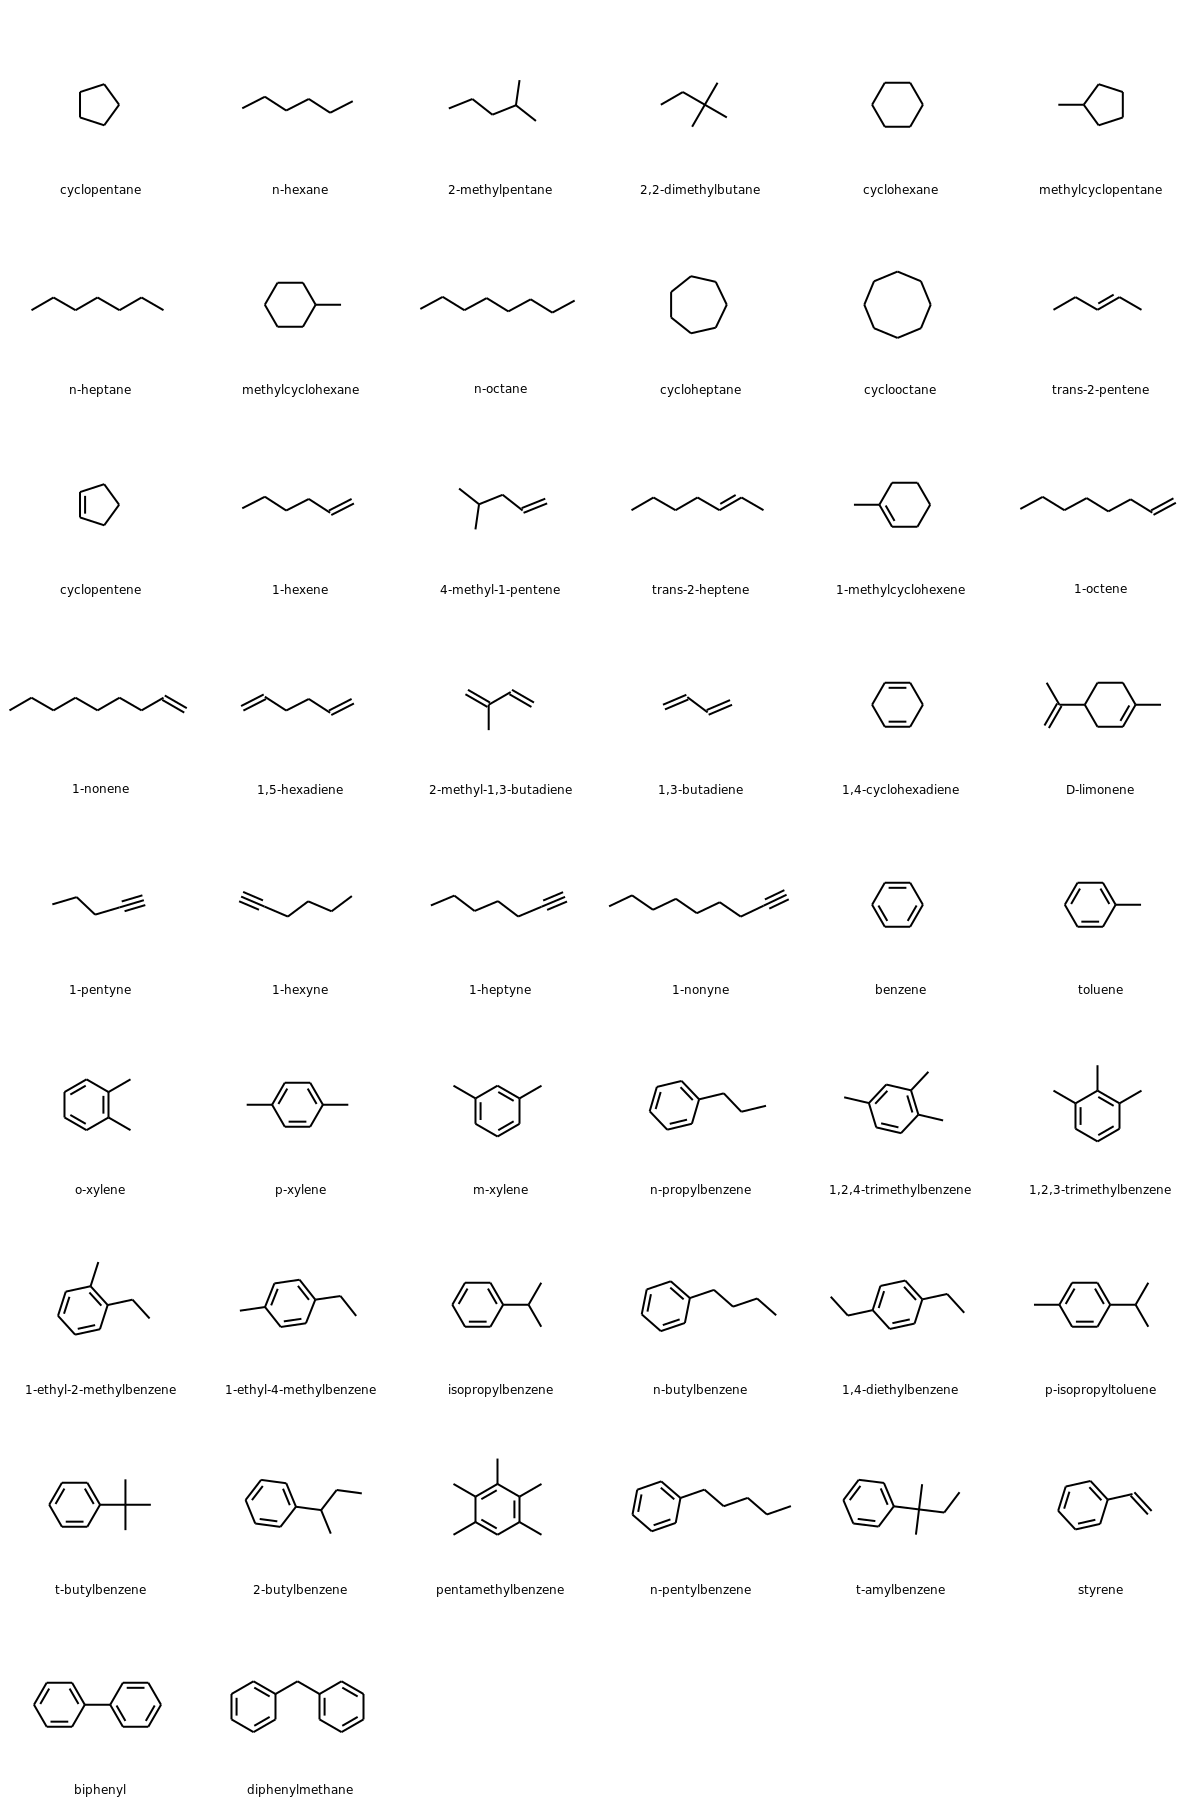

In [14]:
PandasTools.FrameToGridImage(df.iloc[1:100], legendsCol= 'Compound Name', molsPerRow=6)

,ROMol,Solubility
452,,-5.22

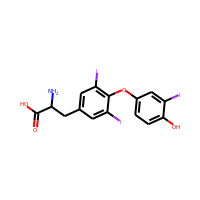

In [15]:
#df['Mol_wt'].hist()
df[df['Mol_wt'] == df['Mol_wt'].max()][['ROMol', 'Solubility']]
#df[df['Mol_wt'] == df['Mol_wt'].min()][['ROMol', 'Solubility']]

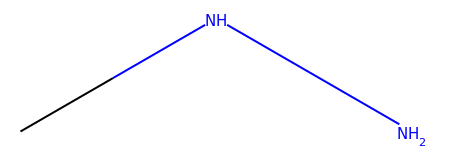

In [16]:
df[df['Mol_wt'] == df['Mol_wt'].min()]['ROMol'].iloc[0]

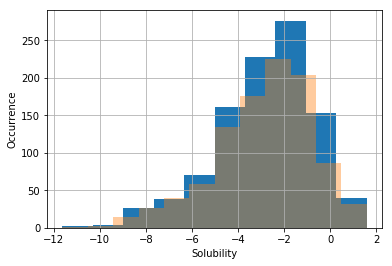

In [17]:
df['Solubility'].hist()
plt.xlabel('Solubility (Ksp)')
plt.ylabel('Occurrence')
sns.distplot(df['Solubility'], kde=False, bins = 12)

Text(0, 0.5, 'Occurrence')

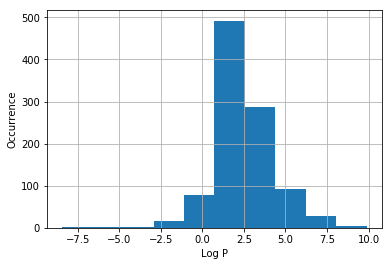

In [18]:
df['logP'].hist()
plt.xlabel('Log P')
plt.ylabel('Occurrence')

Text(0, 0.5, 'Occurrence')

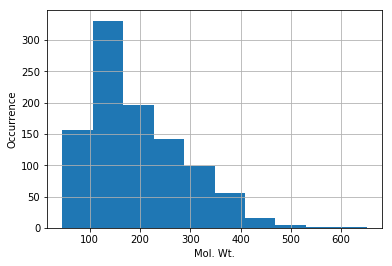

In [19]:
df['Mol_wt'].hist()
plt.xlabel('Mol. Wt.')
plt.ylabel('Occurrence')

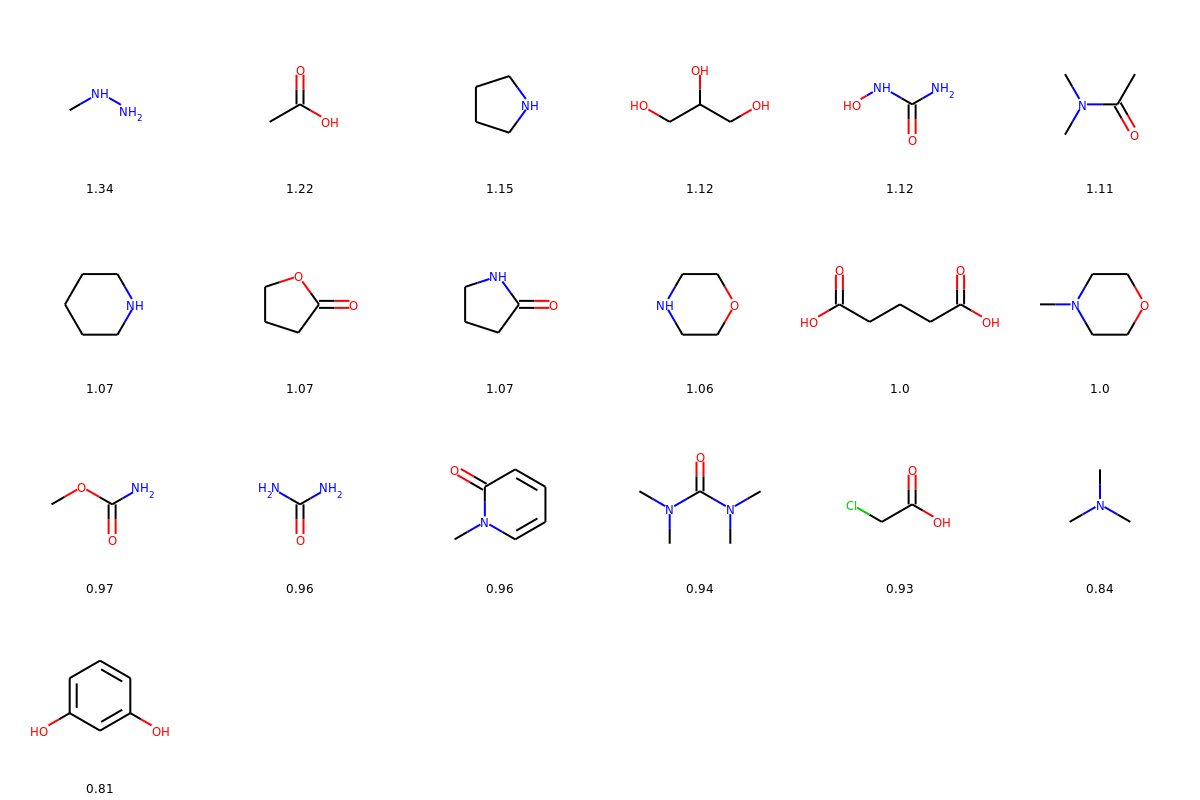

In [20]:
df1 = df[['Solubility', 'Compound Name', 'ROMol']]
df1 = df1.sort_values(by='Solubility', ascending = False)
PandasTools.FrameToGridImage(df1.iloc[1:20], legendsCol= 'Solubility', molsPerRow=6)

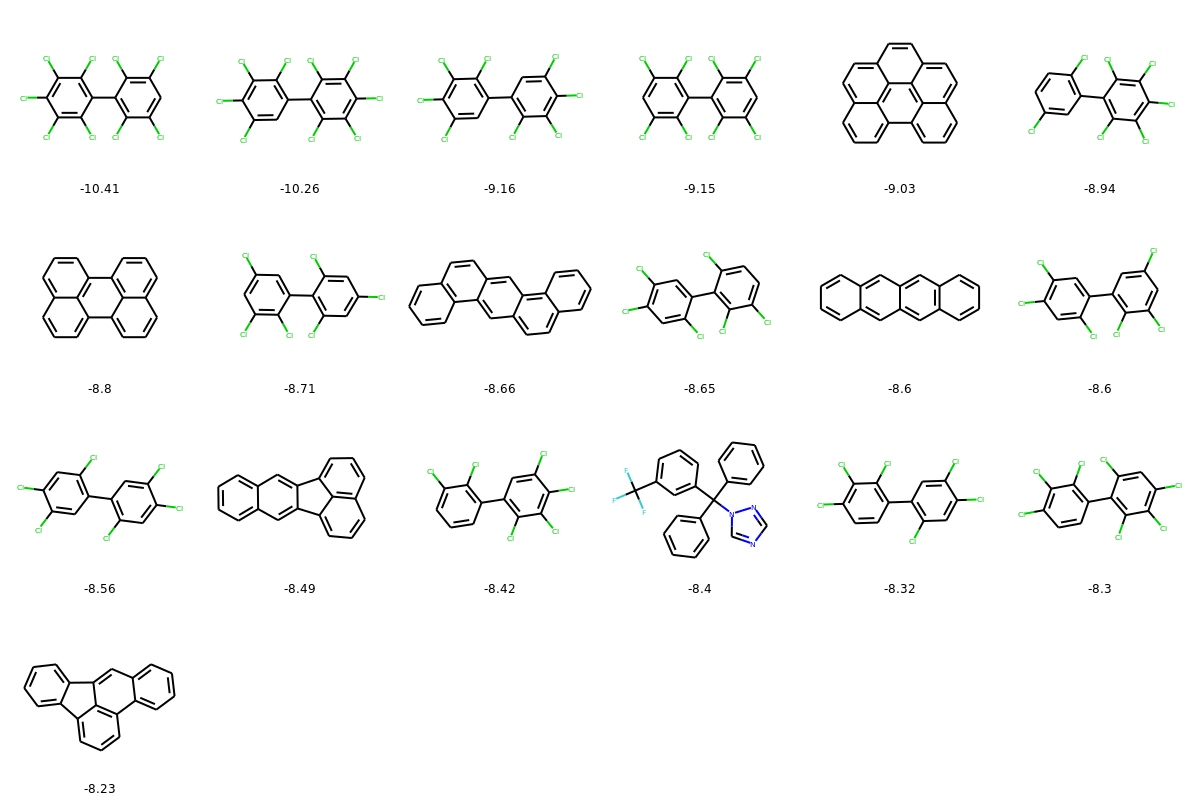

In [21]:
df1 = df[['Solubility', 'Compound Name', 'ROMol']]
df1 = df1.sort_values(by='Solubility')
PandasTools.FrameToGridImage(df1.iloc[1:20], legendsCol= 'Solubility', molsPerRow=6)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

x = np.array(df['Descriptor'].tolist())
st = StandardScaler()
X = st.fit_transform(x)
y = df['Solubility'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(output_dim=5, input_dim=X.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(output_dim=1))
model.add(Activation("linear"))


model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
history = model.fit(X_train, y_train, nb_epoch=500, batch_size=32)
y_pred = model.predict(X_test)
#rms = (np.mean((y_test.reshape(-1,1) - y_pred)**2))**0.5
#s = np.std(y_test -y_pred)
#print ("Neural Network RMS", rms)
y_pred = y_pred.flatten()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/home/ray/miniconda2/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=80, units=5)`
  app.launch_new_instance()
/home/ray/miniconda2/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/home/ray/miniconda2/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/500
750/750 [==============================] - 1s 1ms/step - loss: 4.1898
Epoch 2/500
750/750 [==============================] - 0s 33us/step - loss: 1.3442
Epoch 3/500
750/750 [==============================] - 0s 35us/step - loss: 0.8690
Epoch 4/500
750/750 [==============================] - 0s 46us/step - loss: 0.7280
Epoch 5/500
750/750 [==============================] - 0s 53us/step - loss: 0.6598
Epoch 6/500
750/750 [==============================] - 0s 41us/step - loss: 0.6122
Epoch 7/500
750/750 [==============================] - 0s 46us/step - loss: 0.5836
Epoch 8/500
750/750 [==============================] - 0s 54us/step - loss: 0.5540
Epoch 9/500
750/750 [==============================] - 0s 51us/step - loss: 0.5223
Epoch 10/500
750/750 [==============================] - 0s 48us/step - loss: 0.4998
Epoch 11/500
750/750 [==============================] - 0s 38us/step - loss: 0.4839
Epoch 12/500
750/750 [==============================] - 0s 36us/step - loss: 0.4717
Ep

750/750 [==============================] - 0s 37us/step - loss: 0.2022
Epoch 195/500
750/750 [==============================] - 0s 51us/step - loss: 0.2021
Epoch 196/500
750/750 [==============================] - 0s 41us/step - loss: 0.2037
Epoch 197/500
750/750 [==============================] - 0s 35us/step - loss: 0.2035
Epoch 198/500
750/750 [==============================] - 0s 46us/step - loss: 0.2001
Epoch 199/500
750/750 [==============================] - 0s 38us/step - loss: 0.2024
Epoch 200/500
750/750 [==============================] - 0s 39us/step - loss: 0.2113
Epoch 201/500
750/750 [==============================] - 0s 33us/step - loss: 0.2074
Epoch 202/500
750/750 [==============================] - 0s 42us/step - loss: 0.2029
Epoch 203/500
750/750 [==============================] - 0s 41us/step - loss: 0.2038
Epoch 204/500
750/750 [==============================] - 0s 41us/step - loss: 0.2049
Epoch 205/500
750/750 [==============================] - 0s 41us/step - loss: 0

750/750 [==============================] - 0s 46us/step - loss: 0.1977
Epoch 387/500
750/750 [==============================] - 0s 42us/step - loss: 0.1987
Epoch 388/500
750/750 [==============================] - 0s 45us/step - loss: 0.1997
Epoch 389/500
750/750 [==============================] - 0s 73us/step - loss: 0.1969
Epoch 390/500
750/750 [==============================] - 0s 58us/step - loss: 0.2007
Epoch 391/500
750/750 [==============================] - 0s 50us/step - loss: 0.1972
Epoch 392/500
750/750 [==============================] - 0s 40us/step - loss: 0.1976
Epoch 393/500
750/750 [==============================] - 0s 54us/step - loss: 0.1958
Epoch 394/500
750/750 [==============================] - 0s 31us/step - loss: 0.1956
Epoch 395/500
750/750 [==============================] - 0s 51us/step - loss: 0.1960
Epoch 396/500
750/750 [==============================] - 0s 43us/step - loss: 0.1959
Epoch 397/500
750/750 [==============================] - 0s 44us/step - loss: 0

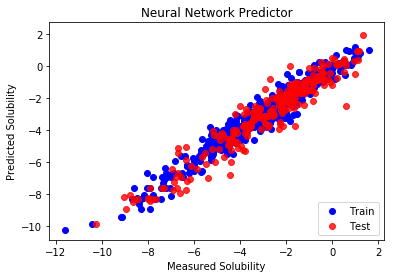

In [23]:
plt.scatter(y_train,model.predict(X_train), label = 'Train', c='blue')
plt.title('Neural Network Predictor')
plt.xlabel('Measured Solubility')
plt.ylabel('Predicted Solubility')
plt.scatter(y_test,model.predict(X_test),c='red', label='Test', alpha = 0.8)
#plt.plot(y,x)
plt.legend(loc=4)
plt.show()

In [34]:
y_test.shape

(250,)

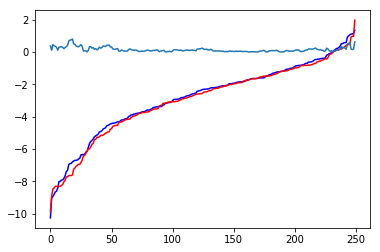

In [27]:
y_test.sort()
y_pred.sort()
plt.plot(y_test, 'b')
plt.plot(y_pred, 'r')
#type(y_test)
#plt.plot(y_test, 'bo')
#plt.plot(y_pred, 'ro')
plt.plot(abs(y_pred-y_test))